<a href="https://colab.research.google.com/github/UFacu/python_sat/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install kaggle

In [1]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
df = pd.read_csv('/content/Fifa_23_Players_Data.csv.zip')
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
17525,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
17526,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
17527,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


1) Limpiamos el dataset: Con las siguientes funciones analizamos los datos para ver si podemos encontrar algun error, tambien utilizamos la funcion duplicate para ver si hay filas repetidas

In [12]:
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17529 entries, 0 to 17528
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     17529 non-null  object
 1   Full Name                    17529 non-null  object
 2   Overall                      17529 non-null  int64 
 3   Potential                    17529 non-null  int64 
 4   Value(in Euro)               17529 non-null  int64 
 5   Positions Played             17529 non-null  object
 6   Best Position                17529 non-null  object
 7   Nationality                  17529 non-null  object
 8   Image Link                   17529 non-null  object
 9   Age                          17529 non-null  int64 
 10  Height(in cm)                17529 non-null  int64 
 11  Weight(in kg)                17529 non-null  int64 
 12  TotalStats                   17529 non-null  int64 
 13  BaseStats                    17

In [15]:
df.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,17529.000000,17529.000000,1.752900e+04,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,1.752900e+04,...,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000
mean,65.943237,71.043471,2.931541e+06,25.296081,181.626847,75.224827,1603.559929,358.365109,9006.942781,5.171944e+06,...,58.484112,57.429060,58.484112,56.308346,55.975812,56.308346,55.675908,54.566775,55.675908,23.325689
std,6.796701,6.172603,7.816143e+06,4.722269,6.832866,7.013211,274.139404,39.652407,19851.989326,1.501628e+07,...,14.035482,13.217884,14.035482,13.949071,13.912260,13.949071,14.202017,14.782078,14.202017,15.187771
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,5.000000e+05,22.000000,177.000000,70.000000,1471.000000,331.000000,1000.000000,6.740000e+05,...,54.000000,53.000000,54.000000,51.000000,49.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1642.000000,359.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1789.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [16]:
 df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17524    False
17525    False
17526    False
17527    False
17528    False
Length: 17529, dtype: bool

2) Realizamos graficos para poder sacar conclusiones

In [18]:
my_df = df.head(100)
final_df= my_df.iloc[:, [0, 1, 2, 3, 4 ,5 ,6 ,7]]
final_df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France
...,...,...,...,...,...,...,...,...
95,D. Mertens,Dries Mertens,84,84,18000000,"CF,ST,CAM",CF,Belgium
96,L. Suárez,Luis Suárez,84,84,18000000,ST,ST,Uruguay
97,D. Tadić,Dušan Tadić,84,84,26500000,"LW,CF,CAM",LW,Serbia
98,D. Berardi,Domenico Berardi,84,84,45000000,"RM,RW",RM,Italy


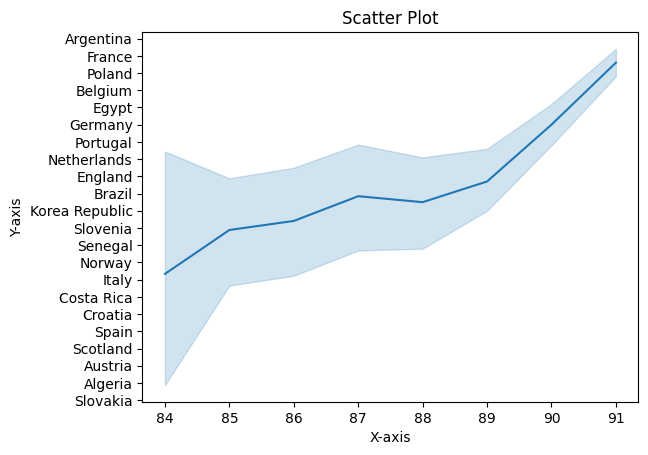

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=final_df,x=final_df['Overall'], y=final_df['Nationality'])

# Agregamos titulos y etiquetas
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Mostrar
plt.show()

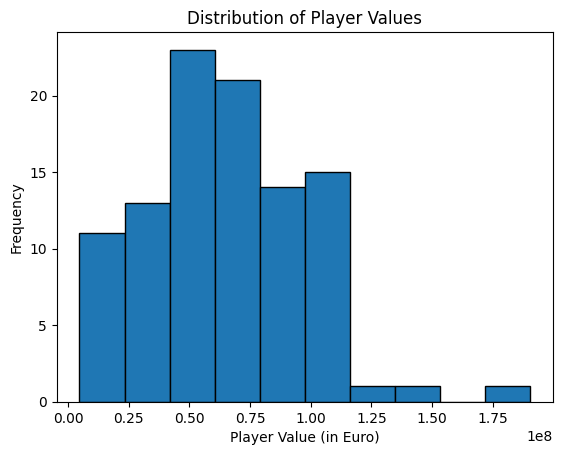

In [25]:
values = final_df['Value(in Euro)']
plt.hist(values, bins=10, edgecolor='black')
plt.xlabel('Player Value (in Euro)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Values')

plt.show()

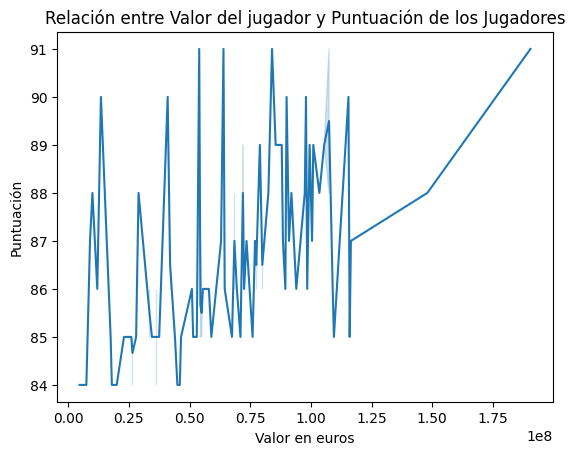

In [31]:
sns.lineplot(data=final_df,x=final_df['Value(in Euro)'], y=final_df['Overall'])

# Agregar etiquetas y título
plt.xlabel('Valor en euros')
plt.ylabel('Puntuación')
plt.title('Relación entre Valor del jugador y Puntuación de los Jugadores')

# Mostrar el gráfico
plt.show()

In [34]:
jugadores_filtrados = df[(df['Age'] < 23) & (df['Overall'] > 80)]

# Obtener los nombres de los primeros 40 jugadores
nombres_jugadores = jugadores_filtrados['Full Name'].head(40)
print(nombres_jugadores)

21                       Erling Haaland
63     Vinícius José de Oliveira Júnior
82                 Pedro González López
83                           Phil Foden
84                     Matthijs de Ligt
124                     Jude Bellingham
126                        Moussa Diaby
131                       Sandro Tonali
136                         Reece James
139                 João Félix Sequeira
141                     Alphonso Davies
144                        Jadon Sancho
152                      Dušan Vlahović
225                       Florian Wirtz
226           Antony Matheus dos Santos
228                  Nico Schlotterbeck
229                         Bukayo Saka
231                 Aurélien Tchouaméni
232                Ferran Torres García
241      Lucas Luciano Mantela Patrício
277                         Evan Ndicka
288                      Nicolò Zaniolo
291         Pedro Antonio Porro Sauceda
296               Rodrygo Silva de Goes
298                    Dejan Kulusevski


Conclusion:

Gráfico 1:
Un gráfico de línea que cruza la nacionalidad con la puntuación de los jugadores permite observar cómo varía el rendimiento promedio de los jugadores según su nacionalidad a lo largo del tiempo. En este caso, paises como Argentina,Francia, Polinia tienen jugadores con mayor global.

Gráfico 2:
Se pueden obtener conclusiones sobre los rangos de precios más comunes, el precio medio, la presencia de valores atípicos y las comparaciones de frecuencias entre diferentes rangos de precios. Este análisis proporciona información sobre la distribución general de los precios de los jugadores en la base de datos.

Gráfico 3:
Este gráfico muestra que el precio no esta directamente relacionado con el global del jugador.

Anális 4:
Determinar los jugadores con las calificaciones más altas en diferentes aspectos y habilidades ayuda a identificar a los jugadores más destacados y valiosos en términos de su rendimiento y habilidades específicas.